# Star Wars Survey Analysis


Below are some of the data field definitions:
* RespondentID - anonymized ID for the person taking the survey
* Gender - respondent's gender
* Age - respondent's age
* Household Income - respondent's household income
* Education - respondent's education level
* Location (Census Region) - respondent's location
* Have you seen any of the 6 films in the Star Wars franchise?
    * Yes
    * No
* Do you consider yourself to be a fan of the Star Wars film franchise?
    * Yes
    * No

Let's load the data set into a variable and explore some of the data contained in this data set.

In [1]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

print("First 10 Records of Data Set:")
print(star_wars.head(10))
print("\nColumn Names in Data Set:")
print(star_wars.columns)

First 10 Records of Data Set:
   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0             

It looks like there are some null fields in the RespondentID field.  Let's remove any records without a RespondentID:

In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
print(star_wars["RespondentID"].isnull().sum())

0


## Converting Yes/No Answers to True/False

It will make processing the answers to Yes/No questions easier and more efficient if we convert any questions with a yes/no answer to true/false.

In [3]:
yes_no = {
    "Yes" : True,
    "No" : False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print("Verify 'Have you seen any of the 6 films in the Star Wars franchise?' have true/false values:")
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

print("Verify 'Do you consider yourself to be a fan of the Star Wars film franchise?' have true/false values:")
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Verify 'Have you seen any of the 6 films in the Star Wars franchise?' have true/false values:
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Verify 'Do you consider yourself to be a fan of the Star Wars film franchise?' have true/false values:
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Addressing the "Unnamed" Column Names

On the survey, there is a question "Which of the following Star Wars films have you seen?  Please select all that apply."  The answer to this question is a series of checkboxes with the names of each of (at the time) 6 Star Wars films:  "Star Wars: Episode I The Phantom Menace", "Star Wars: Episode II Attack of the Clones", "Star Wars: Episode III Revenge of the Sith", "Star Wars: Episode IV A New Hope", "Star Wars: Episode V The Empire Strikes Back", and "Star Wars: Episode VI Return of the Jedi."  If the user checked one of the checkboxes, the name of the film would be filled in one of the "unnamed" fields (unnamed: 4,5,6,7 and 8) and NaN if the option wasn't checked.  To make processing easier, we'll convert the values of these fields to a boolean value and the name of the fields to the name of the movie.

First, we'll confirm the values in each of those fields:

In [4]:
print(star_wars.iloc[:,3:9].head())

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: 

In [15]:
# Convert Values to True/False
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace" : True,
    "Star Wars: Episode II  Attack of the Clones" : True,
    "Star Wars: Episode III  Revenge of the Sith" : True,
    "Star Wars: Episode IV  A New Hope" : True,
    "Star Wars: Episode V The Empire Strikes Back" : True,
    "Star Wars: Episode VI Return of the Jedi" : True,
    np.nan : False
}

for film in star_wars.columns[3:9]:
    star_wars[film] = star_wars[film].map(movie_mapping)

print(star_wars.iloc[:, 3:9].head())

   Which of the following Star Wars films have you seen? Please select all that apply.  \
1                                               True                                     
2                                              False                                     
3                                               True                                     
4                                               True                                     
5                                               True                                     

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
1        True        True        True        True        True  
2       False       False       False       False       False  
3        True        True       False       False       False  
4        True        True        True        True        True  
5        True        True        True        True        True  


In [19]:
# Now rename columns.  Seen_1 represents if the respondents saw episode 1, seen_2 represents if respondants seen
# episode 2, etc.

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6"
})

print(star_wars.head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True

## Cleaning Up Movie Ranking Fields

The next set of questions refers to the following question "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."  With the values in these fields as the numeric ranking (1-6).  We'll just rename the columns to ranking_1 to represent how the respondent ranked episode 1, etc.  We'll also convert the values in these fields to a numeric type to make it easier to compare with each other.

In [21]:
# Change columns 9-14 to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#Change column names to appropriate names
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6",
})

print(star_wars.iloc[:,9:15].head())

   ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1        3.0        2.0        1.0        4.0        5.0        6.0
2        NaN        NaN        NaN        NaN        NaN        NaN
3        1.0        2.0        3.0        4.0        5.0        6.0
4        5.0        6.0        1.0        2.0        4.0        3.0
5        5.0        4.0        6.0        2.0        1.0        3.0


## Highest Ranking Film According to Survey

Now that we converted the rankings to numeric fields, we can determine which film is the most popular.

In [22]:
print(star_wars.iloc[:, 9:15].mean())

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


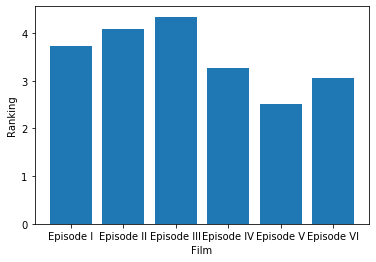

In [40]:
# Visual representation of the average rankings
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), 
        tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Ranking")
plt.show()

The Episode V : Empire Strikes Back is the highest ranking film of the first 6 films (the lower number is the higher ranking as 1 represents the most popular film).

## Movie Attendance for Respondents in Survey

Let's see how many of the respondents saw any of the movies.

In [41]:
print(star_wars.iloc[:,3:9].sum())

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


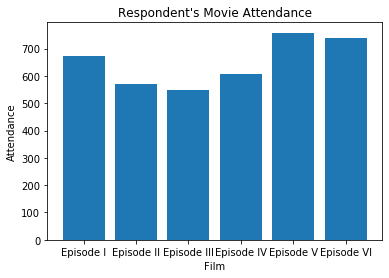

In [44]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(),
       tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Attendance")
plt.title("Respondent's Movie Attendance")
plt.show()

Episode V: Empire Strikes Back has the most attendance according to our survey.  This result supports our earlier result that the most popular film among fans would garner the most attendance.

## Most Popular Films Based on Gender

Let's find out which films were popular among men and women.

In [45]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

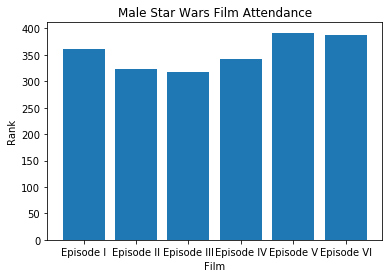

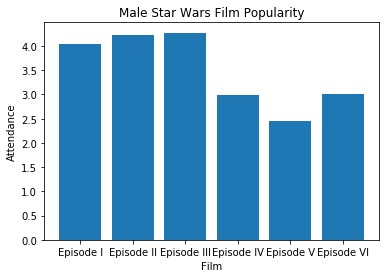

In [52]:
# Films popular amongst men:

plt.bar(range(6), males[males.columns[3:9]].sum(),
        tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Rank")
plt.title("Male Star Wars Film Attendance")
plt.show()

plt.bar(range(6), males[males.columns[9:15]].mean(),
       tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Attendance")
plt.title("Male Star Wars Film Popularity")
plt.show()

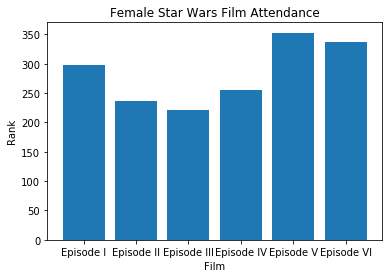

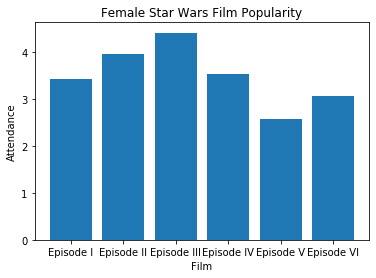

In [51]:
# Films popular amongst women:

plt.bar(range(6), females[females.columns[3:9]].sum(),
        tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Rank")
plt.title("Female Star Wars Film Attendance")
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean(),
       tick_label=["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])
plt.xlabel("Film")
plt.ylabel("Attendance")
plt.title("Female Star Wars Film Popularity")
plt.show()

Seems like men attended the first 3 episodes more, but enjoyed them a lot less than women.